# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
lat = []
lng = []
new_cities = []

temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
res = list(zip(*lat_lngs))
# print(lats)
# print(lngs)
# print(lats[0])
# print(lngs[0])

#res

#np.savetxt('data.csv', (lats, lngs), delimiter=',')

# df = pd.DataFrame(lats,lngs)
# df
#len(cities)
#rand_cities_500 = random.sample(500)
#print(len(rand_cities_500))
#print(random.randint(0,588))

print(len(lats))
(len(lngs))

612
1500


1500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [26]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "London"
units = "imperial"

# Build query URL

# query_url = f"{url}appid={weather_api_key}&units={units}&q="
# query_url

query_url = url + "appid=" + weather_api_key + "&units="+units + "&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?appid=e6117bf5ca8716ad7b550f3fd123c0ed&units=imperial&q='

In [27]:
# # # # Loop through the list of cities and perform a request for data on each

# # # #Use time.sleep(60) after every 50 loops!!!


# count = 0

# for city in cities:
#     count += 1
#     if count >= 51:
#         time.sleep(60)
#         count = 1
        
#     try:
#         response = requests.get(query_url + city)
#         #print(city)
#         #print(response.content)
#         response_json = response.json()
#         #print(response_json.content)
#         temp.append(response_json["main"]["temp"])
#         lat.append(response_json["coord"]["lat"])
#         lng.append(response_json["coord"]["lon"])
#         humidity.append(response_json["main"]["humidity"])
#         wind_speed.append(response_json["wind"]["speed"])
#         country.append(response_json["sys"]["country"])
#         date.append(response_json["dt"])
#         cloudiness.append(response_json["clouds"]["all"])
#         new_cities.append(city)
        
    
        
       
#         #print(date)
        

#         #print(response.content)
            

#     except Exception as e:
#         print(f"Couldn't find {city} because of error {e}.")



In [28]:
#print(response_json)
#print(response_json["clouds"]["all"])



In [29]:
#print(temp)
#print(lat)
#print(new_cities)
#print(lng)
#print(humidity)
#print(wind_speed)
#print(country)
#print(date)
#print(cloudiness)

print(len(temp))
print(len(lat))
print(len(new_cities))
print(len(lng))
print(len(humidity))
print(len(wind_speed))
print(len(country))
print(len(date))
print(len(cloudiness))

0
0
0
0
0
0
0
0
0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
weather_dict = {
    "City": new_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
    "Cloudiness": cloudiness

}

# weather_data = pd.DataFrame(weather_dict)
# weather_data.to_csv("weather_Data.csv")
# weather_data



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#  Get the indices of cities that have humidity over 100%.
new_weather_data = weather_data.loc[weather_data["Humidity"] > 100]
new_weather_data

,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Country,Date,Cloudiness


In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

new_weather_data = weather_data.loc[weather_data["Humidity"] <= 100]
new_weather_data

,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Country,Date,Cloudiness
0,cidreira,-30.1811,-50.2056,81.93,58,9.57,BR,1645373554,0
1,port alfred,-33.5906,26.8910,73.44,67,19.57,ZA,1645373554,4
2,rikitea,-23.1203,-134.9692,77.47,74,9.46,PF,1645373508,20
3,saldanha,-33.0117,17.9442,66.02,78,11.59,ZA,1645373554,15
4,katsuura,35.1333,140.3000,37.98,48,23.04,JP,1645373555,99
...,...,...,...,...,...,...,...,...,...
555,valcourt,45.5001,-72.3158,10.92,67,7.45,CA,1645374449,23
556,bourne,52.7667,-0.3833,53.04,87,29.93,GB,1645374474,75
557,tilichiki,60.4667,166.1000,-26.68,94,8.86,RU,1645374474,11
558,inuvik,68.3499,-133.7218,-25.58,72,6.91,CA,1645374474,0


In [33]:

new_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 0 to 559
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        560 non-null    object 
 1   Lat         560 non-null    float64
 2   Lng         560 non-null    float64
 3   Max Temp    560 non-null    float64
 4   Humidity    560 non-null    int64  
 5   Wind Speed  560 non-null    float64
 6   Country     560 non-null    object 
 7   Date        560 non-null    int64  
 8   Cloudiness  560 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 43.8+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

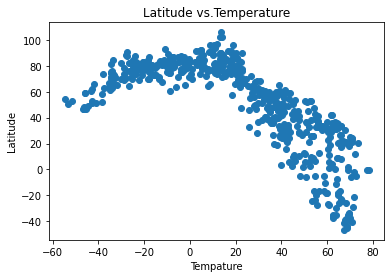

In [34]:
plt.scatter(new_weather_data["Lat"], new_weather_data["Max Temp"])
plt.title("Latitude vs.Temperature")
plt.ylabel("Latitude")
plt.xlabel("Tempature")
plt.show()

#negative correlation

## Latitude vs. Humidity Plot

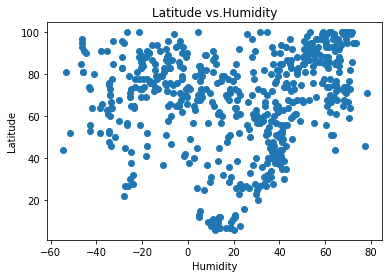

In [35]:
plt.scatter(new_weather_data["Lat"], new_weather_data["Humidity"])
plt.title("Latitude vs.Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

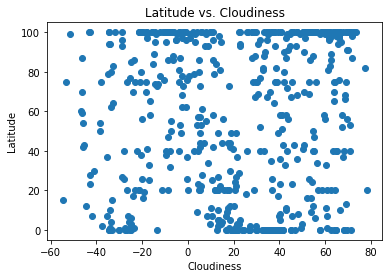

In [36]:
plt.scatter(new_weather_data["Lat"], new_weather_data["Cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.show()

#no correlation

## Latitude vs. Wind Speed Plot

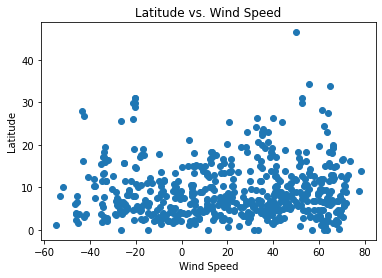

In [37]:
plt.scatter(new_weather_data["Lat"], new_weather_data["Wind Speed"])
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.show()

#no correlation

## Linear Regression

In [38]:
north_hemi_df = new_weather_data.loc[new_weather_data["Lat"] > 0]
south_hemi_df = new_weather_data.loc[new_weather_data["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

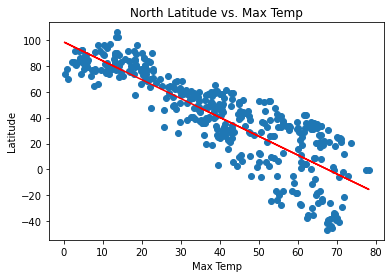

In [39]:


# Run regresson on hemisphere weather data.
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi_df["Lat"], north_hemi_df["Max Temp"])

new_ys = north_hemi_df["Lat"] * slope + intercept

plt.scatter(north_hemi_df["Lat"], north_hemi_df["Max Temp"])
plt.title("North Latitude vs. Max Temp")
plt.ylabel("Latitude")
plt.xlabel("Max Temp")
plt.plot(north_hemi_df["Lat"],new_ys,"r")
plt.show()
#strong negative correlation

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

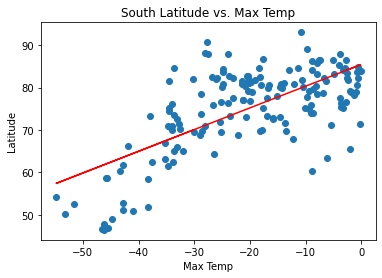

In [40]:
# Run regresson on hemisphere weather data.
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi_df["Lat"], south_hemi_df["Max Temp"])

new_ys = south_hemi_df["Lat"] * slope + intercept

plt.scatter(south_hemi_df["Lat"], south_hemi_df["Max Temp"])
plt.title("South Latitude vs. Max Temp")
plt.ylabel("Latitude")
plt.xlabel("Max Temp")
plt.plot(south_hemi_df["Lat"],new_ys,"r")
plt.show()

#positve correlation not as strong

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

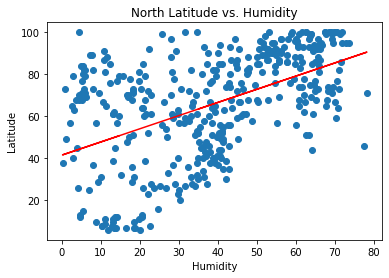

In [41]:
# Run regresson on hemisphere weather data.
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi_df["Lat"], north_hemi_df["Humidity"])

new_ys = north_hemi_df["Lat"] * slope + intercept

plt.scatter(north_hemi_df["Lat"], north_hemi_df["Humidity"])
plt.title("North Latitude vs. Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.plot(north_hemi_df["Lat"],new_ys,"r")
plt.show()
#weak positive correlation

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

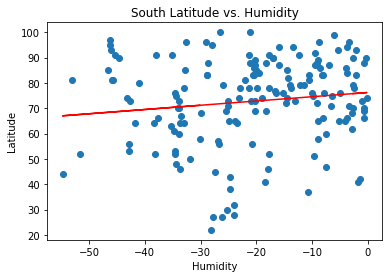

In [42]:
# Run regresson on hemisphere weather data.
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi_df["Lat"], south_hemi_df["Humidity"])

new_ys = south_hemi_df["Lat"] * slope + intercept

plt.scatter(south_hemi_df["Lat"], south_hemi_df["Humidity"])
plt.title("South Latitude vs. Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity")
plt.plot(south_hemi_df["Lat"],new_ys,"r")
plt.show()
#weak positive correlation

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

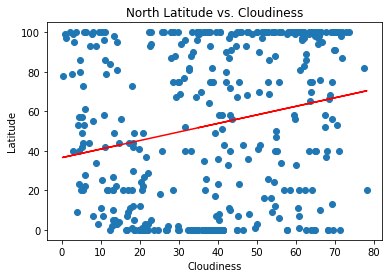

In [43]:
# Run regresson on hemisphere weather data.
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi_df["Lat"], north_hemi_df["Cloudiness"])

new_ys = north_hemi_df["Lat"] * slope + intercept

plt.scatter(north_hemi_df["Lat"], north_hemi_df["Cloudiness"])
plt.title("North Latitude vs. Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.plot(north_hemi_df["Lat"],new_ys,"r")
plt.show()
# no correlation

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

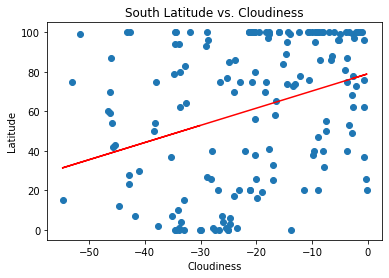

In [44]:
# Run regresson on hemisphere weather data.
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi_df["Lat"], south_hemi_df["Cloudiness"])

new_ys = south_hemi_df["Lat"] * slope + intercept

plt.scatter(south_hemi_df["Lat"], south_hemi_df["Cloudiness"])
plt.title("South Latitude vs. Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness")
plt.plot(south_hemi_df["Lat"],new_ys,"r")
plt.show()
# no correlation

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

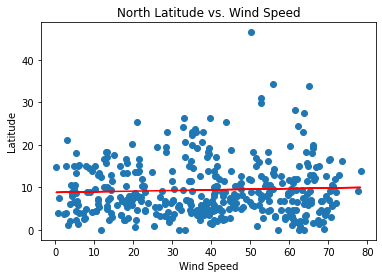

In [45]:
# Run regresson on hemisphere weather data.
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hemi_df["Lat"], north_hemi_df["Wind Speed"])

new_ys = north_hemi_df["Lat"] * slope + intercept

plt.scatter(north_hemi_df["Lat"], north_hemi_df["Wind Speed"])
plt.title("North Latitude vs. Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.plot(north_hemi_df["Lat"],new_ys,"r")
plt.show()
# weak positive correlation

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

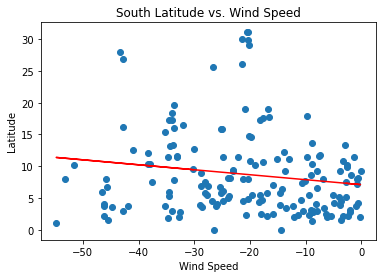

In [46]:
# Run regresson on hemisphere weather data.
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hemi_df["Lat"], south_hemi_df["Wind Speed"])

new_ys = south_hemi_df["Lat"] * slope + intercept

plt.scatter(south_hemi_df["Lat"], south_hemi_df["Wind Speed"])
plt.title("South Latitude vs. Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed")
plt.plot(south_hemi_df["Lat"],new_ys,"r")
plt.show()
# weak negative correlation